In [1]:
import pandas as pd
from io import StringIO

csvfile = """label,x,y
class1,10.0,8.04
class1,10.5,7.30
class2,8.3,5.5
class2,8.1,5.9
class3,3.5,3.5
class3,3.8,5.1"""

df = pd.read_csv(StringIO(csvfile))
df

,label,x,y
0,class1,10.0,8.04
1,class1,10.5,7.30
2,class2,8.3,5.50
3,class2,8.1,5.90
4,class3,3.5,3.50
5,class3,3.8,5.10


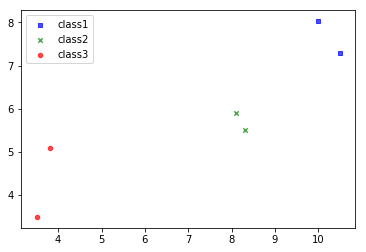

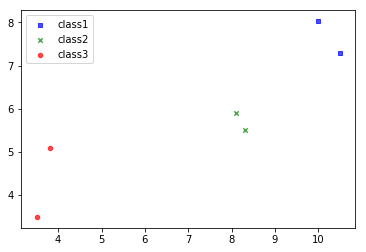

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fig = category_scatter(x='x', y='y', label_col='label', 
                       data=df, legend_loc='upper left')
plt.show()

In [6]:
import numpy as np
from io import BytesIO

csvfile = """1,10.0,8.04
1,10.5,7.30
2,8.3,5.5
2,8.1,5.9
3,3.5,3.5
3,3.8,5.1"""

ary = np.genfromtxt(BytesIO(csvfile.encode()), delimiter=',')
ary

array([[  1.  ,  10.  ,   8.04],
       [  1.  ,  10.5 ,   7.3 ],
       [  2.  ,   8.3 ,   5.5 ],
       [  2.  ,   8.1 ,   5.9 ],
       [  3.  ,   3.5 ,   3.5 ],
       [  3.  ,   3.8 ,   5.1 ]])

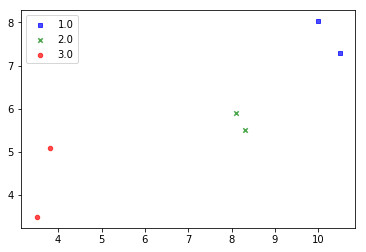

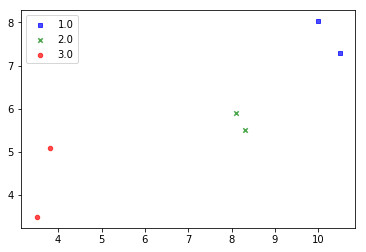

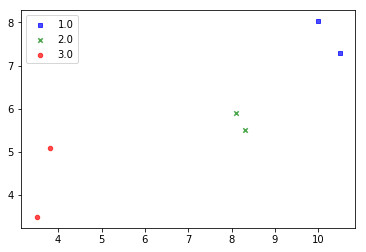

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fix = category_scatter(x=1, y=2, label_col=0, 
                       data=ary, legend_loc='upper left')
plt.show()

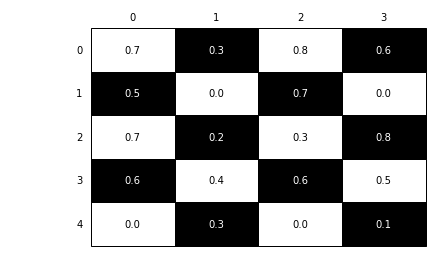

In [10]:
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt
import numpy as np

ary = np.random.random((5, 4))

brd = checkerboard_plot(ary)
plt.show()

In [13]:
import numpy as np
from mlxtend.preprocessing import MeanCenterer
X_train = np.array(
                   [[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
mc = MeanCenterer().fit(X_train)
mc
mc.transform(X_train)

array([[-3., -3., -3.],
       [ 0.,  0.,  0.],
       [ 3.,  3.,  3.]])

In [14]:
from mlxtend.preprocessing import one_hot
import numpy as np

y = np.array([0, 1, 2, 1, 2])
one_hot(y)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [24]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'class label']
df


{'class1', 'class2'}

In [26]:
class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}

df['class label'] = df['class label'].map(class_mapping)
df


,color,size,price,class label
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [27]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,class label
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [28]:
color_mapping = {
           'green': (0,0,1),
           'red': (0,1,0),
           'blue': (1,0,0)}

df['color'] = df['color'].map(color_mapping)
df

,color,size,price,class label
0,"(0, 0, 1)",1,10.1,0
1,"(0, 1, 0)",2,13.5,1
2,"(1, 0, 0)",3,15.3,0


In [29]:
import numpy as np
y = df['class label'].values
X = df.iloc[:, :-1].values
X = np.apply_along_axis(func1d= lambda x: np.array(list(x[0]) + list(x[1:])), axis=1, arr=X)

print('Class labels:', y)
print('\nFeatures:\n', X)

Class labels: [0 1 0]

Features:
 [[  0.    0.    1.    1.   10.1]
 [  0.    1.    0.    2.   13.5]
 [  1.    0.    0.    3.   15.3]]


In [30]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'class label']

size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}
df['size'] = df['size'].map(size_mapping)

class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}
df['class label'] = df['class label'].map(class_mapping)


df

,color,size,price,class label
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [31]:
pd.get_dummies(df)

,size,price,class label,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


In [32]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])
pd.get_dummies(df)

,2,0_blue,0_green,0_red,1_L,1_M,1_XL,3_class1,3_class2
0,10.1,0,1,0,0,1,0,1,0
1,13.5,0,0,1,1,0,0,0,1
2,15.3,1,0,0,0,0,1,1,0


In [33]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [34]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [35]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [36]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


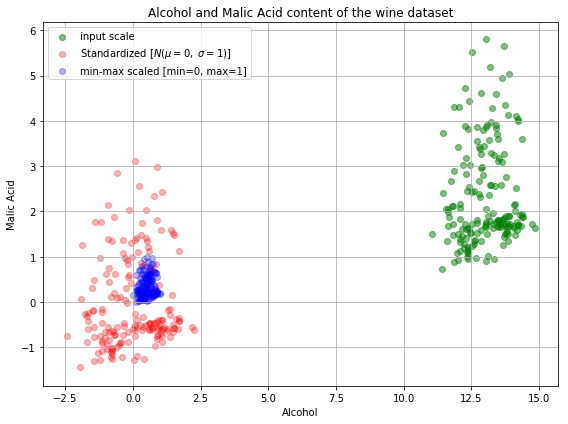

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

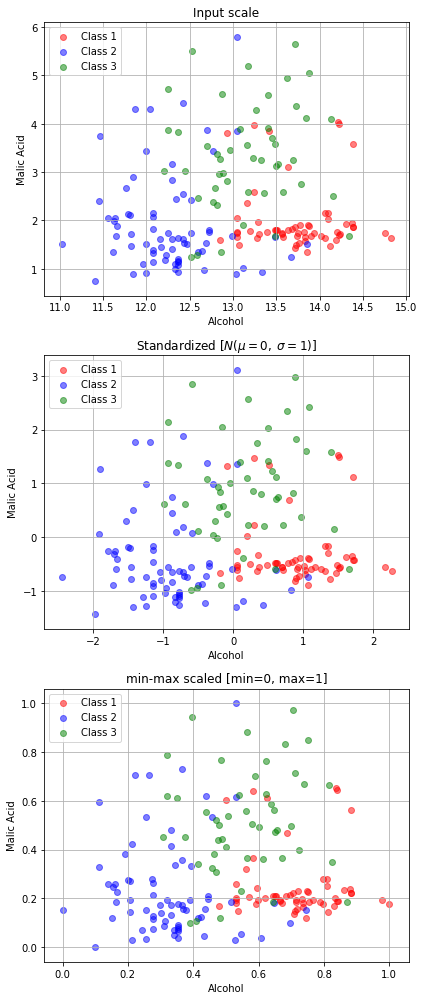

In [38]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

In [57]:
#d[df['Class label'].values == i, 0]
import numpy as np
A = np.array([[1,2,1],
              [4,5,0],
              [7,8,1]])
A

array([[1, 2, 1],
       [4, 5, 0],
       [7, 8, 1]])

In [58]:
A[A[:,2]==1,0]

array([1, 7])

In [64]:
A[:,1][A[:,2]==1]

array([2, 8])

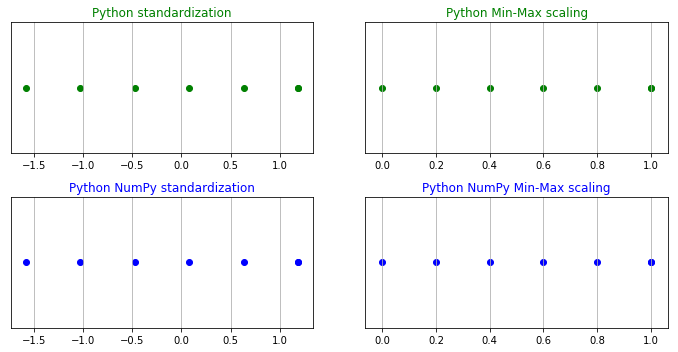

In [61]:
# pure python
# Standardization

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

# Min-Max scaling

minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

# Numpy
import numpy as np

# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())



from matplotlib import pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')
    
plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


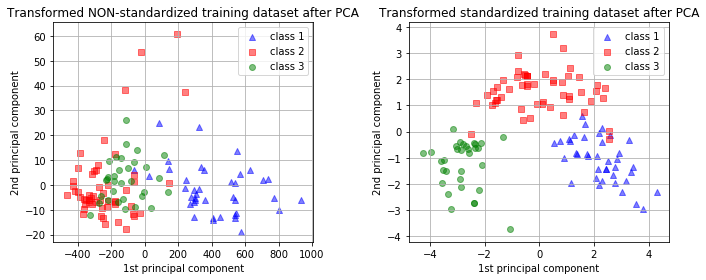

In [62]:
import pandas as pd

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
    header=None,
    )

from sklearn.cross_validation import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=12345)

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

%matplotlib inline

from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

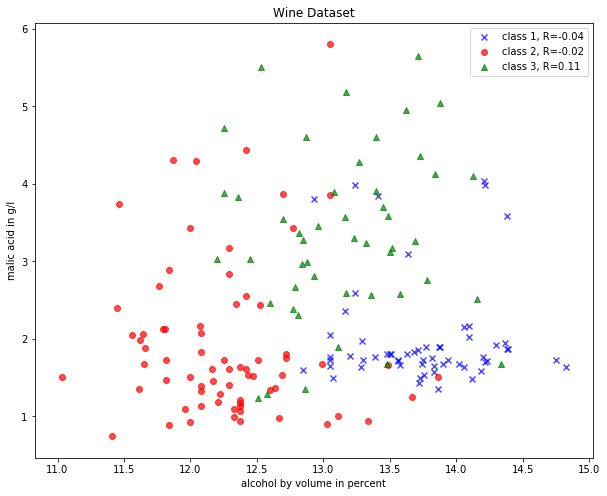

In [63]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label], # x-axis: feat. from col. 1
                y=X_wine[:,1][y_wine == label], # y-axis: feat. from col. 2
                marker=marker, # data point symbol for the scatter plot
                color=color,
                alpha=0.7, 
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )
    
plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

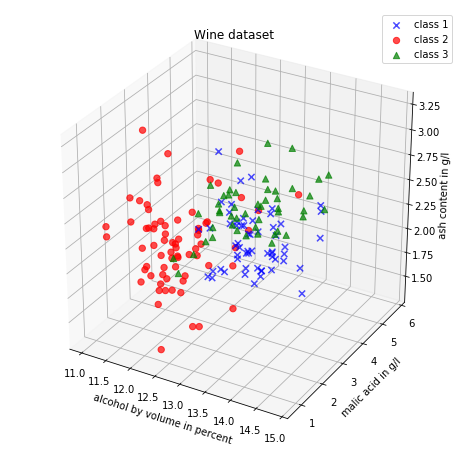

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):
    
    ax.scatter(X_wine[:,0][y_wine == label], 
               X_wine[:,1][y_wine == label], 
               X_wine[:,2][y_wine == label],  
               marker=marker, 
               color=color, 
               s=40, 
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')
plt.legend(loc='upper right')
plt.title('Wine dataset')
     
plt.show()

In [66]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)

print('Class label frequencies')
        
print('\nTraining Dataset:')    
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))
    
print('\nTest Dataset:')     
for l in range(1,4):
    print('Class {:} samples: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Class label frequencies

Training Dataset:
Class 1 samples: 36.29%
Class 2 samples: 42.74%
Class 3 samples: 20.97%

Test Dataset:
Class 1 samples: 25.93%
Class 2 samples: 33.33%
Class 3 samples: 40.74%


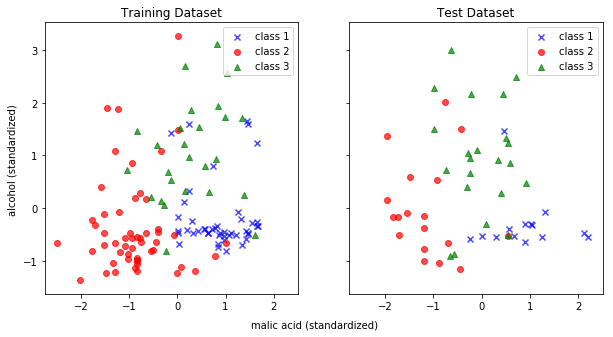

In [67]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train, X_test), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper right')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()


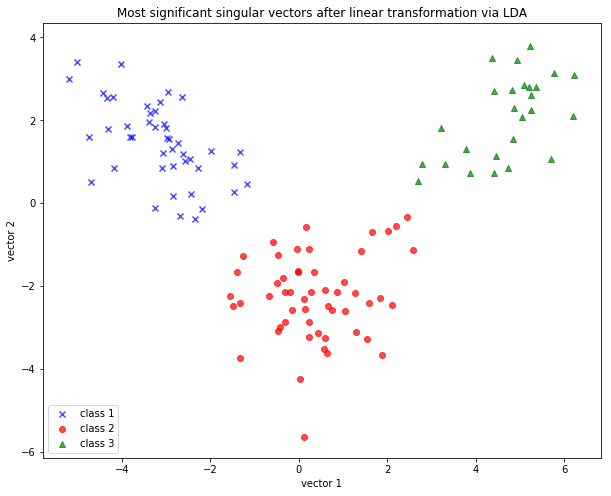

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
sklearn_transf = sklearn_lda.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=sklearn_transf[:,0][y_train == label],
                y=sklearn_transf[:,1][y_train == label], 
                marker=marker, 
                color=color,
                alpha=0.7, 
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()


In [69]:
# fit model
lda_clf = LDA()
lda_clf.fit(X_train, y_train)
LDA(n_components=None, priors=None)

# prediction
print('1st sample from test dataset classified as:', lda_clf.predict(X_test[0,:].reshape(1, -1)))
print('actual class label:', y_test[0])

1st sample from test dataset classified as: [ 3.]
actual class label: 3.0


In [70]:
from sklearn import metrics
pred_train = lda_clf.predict(X_train)

print('Prediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

Prediction accuracy for the training dataset
100.00%


In [71]:
pred_test = lda_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))

Prediction accuracy for the test dataset
98.15%


In [72]:
print('Confusion Matrix of the LDA-classifier')
print(metrics.confusion_matrix(y_test, lda_clf.predict(X_test)))

Confusion Matrix of the LDA-classifier
[[14  0  0]
 [ 1 17  0]
 [ 0  0 22]]


In [73]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

pred_train = sgd_clf.predict(X_train)
pred_test = sgd_clf.predict(X_test)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train)))

print('Prediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('Confusion Matrix of the SGD-classifier')
print(metrics.confusion_matrix(y_test, sgd_clf.predict(X_test)))


Prediction accuracy for the training dataset
100.00%

Prediction accuracy for the test dataset
96.30%

Confusion Matrix of the SGD-classifier
[[14  0  0]
 [ 1 17  0]
 [ 0  1 21]]
